<a href="https://colab.research.google.com/github/rajat1911996sharma/Board-Game-Review-Predictions/blob/main/Board_Game_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
games = pd.read_csv('games.csv')
 

In [68]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [69]:
games.info

<bound method DataFrame.info of            id                type  ... total_weights  average_weight
0       12333           boardgame  ...          2562          3.4785
1      120677           boardgame  ...          1423          3.8939
2      102794           boardgame  ...           777          3.7761
3       25613           boardgame  ...          1642          4.1590
4        3076           boardgame  ...          5213          3.2943
...       ...                 ...  ...           ...             ...
81307  184441  boardgameexpansion  ...             0          0.0000
81308  184442           boardgame  ...             0          0.0000
81309  184443           boardgame  ...             0          0.0000
81310  184449           boardgame  ...             0          0.0000
81311  184451           boardgame  ...             0          0.0000

[81312 rows x 20 columns]>

In [70]:
games.describe

<bound method NDFrame.describe of            id                type  ... total_weights  average_weight
0       12333           boardgame  ...          2562          3.4785
1      120677           boardgame  ...          1423          3.8939
2      102794           boardgame  ...           777          3.7761
3       25613           boardgame  ...          1642          4.1590
4        3076           boardgame  ...          5213          3.2943
...       ...                 ...  ...           ...             ...
81307  184441  boardgameexpansion  ...             0          0.0000
81308  184442           boardgame  ...             0          0.0000
81309  184443           boardgame  ...             0          0.0000
81310  184449           boardgame  ...             0          0.0000
81311  184451           boardgame  ...             0          0.0000

[81312 rows x 20 columns]>

In [71]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [72]:
games.isna().count()

id                      81312
type                    81312
name                    81312
yearpublished           81312
minplayers              81312
maxplayers              81312
playingtime             81312
minplaytime             81312
maxplaytime             81312
minage                  81312
users_rated             81312
average_rating          81312
bayes_average_rating    81312
total_owners            81312
total_traders           81312
total_wanters           81312
total_wishers           81312
total_comments          81312
total_weights           81312
average_weight          81312
dtype: int64

We can see that our dataset has no na values

In [73]:
#we will try to predict average rating of the game

Exploratory Data Analysis

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

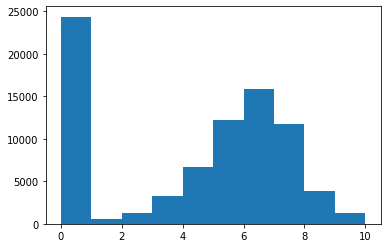

In [74]:
plt.hist(games['average_rating'])

We have 24380 games with average rating of 0. 

In [75]:
games['average_rating']==0

0        False
1        False
2        False
3        False
4        False
         ...  
81307     True
81308     True
81309     True
81310     True
81311     True
Name: average_rating, Length: 81312, dtype: bool

In [76]:
games[games['average_rating']==0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

We will remove any rows that dont have user ratings

In [77]:
games['users_rated'] > 0

0         True
1         True
2         True
3         True
4         True
         ...  
81307    False
81308    False
81309    False
81310    False
81311    False
Name: users_rated, Length: 81312, dtype: bool

In [78]:
games = games[games['users_rated'] > 0]

In [79]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [80]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56932 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56932 non-null  int64  
 1   type                  56932 non-null  object 
 2   name                  56896 non-null  object 
 3   yearpublished         56930 non-null  float64
 4   minplayers            56930 non-null  float64
 5   maxplayers            56930 non-null  float64
 6   playingtime           56930 non-null  float64
 7   minplaytime           56930 non-null  float64
 8   maxplaytime           56930 non-null  float64
 9   minage                56930 non-null  float64
 10  users_rated           56932 non-null  int64  
 11  average_rating        56932 non-null  float64
 12  bayes_average_rating  56932 non-null  float64
 13  total_owners          56932 non-null  int64  
 14  total_traders         56932 non-null  int64  
 15  total_wanters      

Now, we will remove any rows with na values

In [81]:
games = games.dropna(axis=0)

In [82]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56894 non-null  int64  
 1   type                  56894 non-null  object 
 2   name                  56894 non-null  object 
 3   yearpublished         56894 non-null  float64
 4   minplayers            56894 non-null  float64
 5   maxplayers            56894 non-null  float64
 6   playingtime           56894 non-null  float64
 7   minplaytime           56894 non-null  float64
 8   maxplaytime           56894 non-null  float64
 9   minage                56894 non-null  float64
 10  users_rated           56894 non-null  int64  
 11  average_rating        56894 non-null  float64
 12  bayes_average_rating  56894 non-null  float64
 13  total_owners          56894 non-null  int64  
 14  total_traders         56894 non-null  int64  
 15  total_wanters      

In [85]:
games.isnull().value_counts().sum()

56894

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

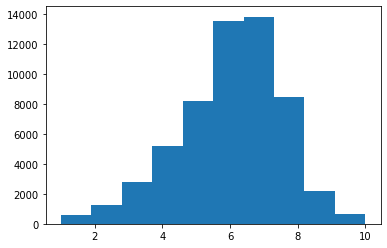

In [86]:
plt.hist(games['average_rating'])

The graph is much improved this way.
Shape changed

In [87]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

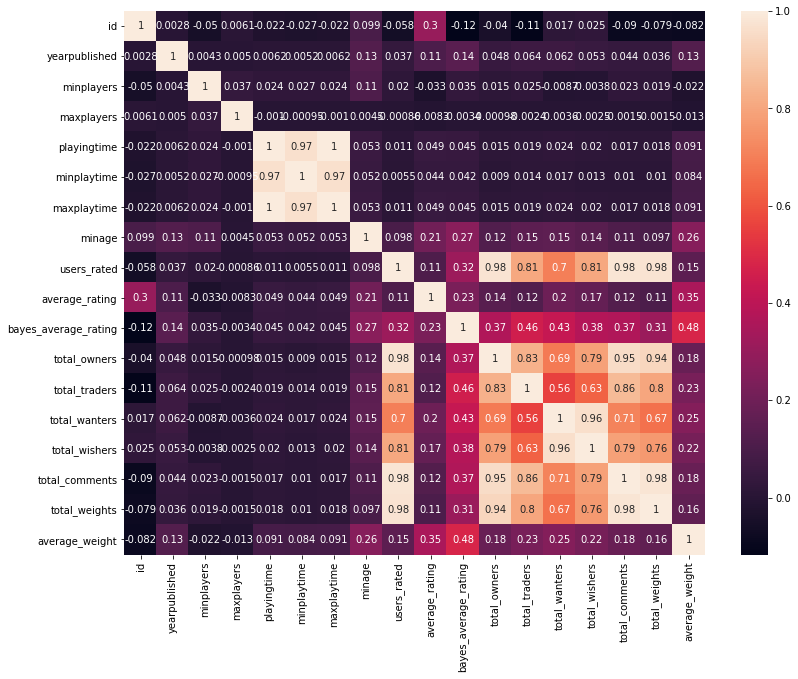

In [88]:
plt.figure(figsize=(13,10))
sns.heatmap(games.corr(),annot=True)

Data Preprocessing

In [89]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [90]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56894 non-null  int64  
 1   type                  56894 non-null  object 
 2   name                  56894 non-null  object 
 3   yearpublished         56894 non-null  float64
 4   minplayers            56894 non-null  float64
 5   maxplayers            56894 non-null  float64
 6   playingtime           56894 non-null  float64
 7   minplaytime           56894 non-null  float64
 8   maxplaytime           56894 non-null  float64
 9   minage                56894 non-null  float64
 10  users_rated           56894 non-null  int64  
 11  average_rating        56894 non-null  float64
 12  bayes_average_rating  56894 non-null  float64
 13  total_owners          56894 non-null  int64  
 14  total_traders         56894 non-null  int64  
 15  total_wanters      

In [91]:
games.drop(games[['id','type','name','bayes_average_rating']],axis=1,inplace=True)

In [92]:
games.columns

Index(['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
       'total_comments', 'total_weights', 'average_weight'],
      dtype='object')

In [94]:
games.select_dtypes(['object']).columns

Index([], dtype='object')

In [95]:
games.columns.value_counts().sum()

16

In [145]:
X = games.drop('average_rating',axis=1)
y = games['average_rating']

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [99]:
X_train.shape

(39825, 15)

In [100]:
X_test.shape

(17069, 15)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
pred = lr.predict(X_test)

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
print(pred)

[5.55545878 5.97215511 5.55059787 ... 5.09848785 6.00678589 6.34785114]


In [110]:
print(y_test)

23994    6.00000
21708    7.33333
79322    4.00000
721      6.97824
23369    4.60000
          ...   
56832    4.00000
46844    7.62500
70242    7.00000
12551    4.94345
53749    8.00000
Name: average_rating, Length: 17069, dtype: float64


In [111]:
print(mean_squared_error(y_test,pred))


2.1124224124579145


There was no strong correlation so the mean squared error value is ok.
The lower the value the better

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [116]:
rfr_pred = rfr.predict(X_test)

In [117]:
print(mean_squared_error(y_test,rfr_pred))

1.5071055301591192


In [118]:
#lesser value 
#better results

Lets see how the value holds

In [120]:
X_test.iloc[0]

yearpublished     0.0
minplayers        1.0
maxplayers        5.0
playingtime       0.0
minplaytime       0.0
maxplaytime       0.0
minage            0.0
users_rated       1.0
total_owners      6.0
total_traders     0.0
total_wanters     0.0
total_wishers     0.0
total_comments    1.0
total_weights     2.0
average_weight    1.5
Name: 23994, dtype: float64

In [121]:
rating_lr = lr.predict(X_test.iloc[0].values.reshape(1,-1))
rating_rfr = rfr.predict(X_test.iloc[0].values.reshape(1,-1))


In [122]:
print(rating_lr)
print(rating_rfr)

[5.55545878]
[5.5825988]


In [124]:
y_test.iloc[0]

6.0

The random forest is more accurate than linear regression

Predictions seem to be off by 0.5 which is not really good

In [182]:
X = games.drop('average_rating',axis=1).values
y = games['average_rating'].values

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
scaler = MinMaxScaler()

In [185]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [187]:
model = Sequential()

In [188]:
X_train.shape

(39825, 15)

In [204]:
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [205]:
model.compile(loss='mse',optimizer='adam')

In [206]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25)

In [207]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=400,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/400
156/156 [==============================] - 0s 2ms/step - loss: 20.4757 - val_loss: 3.5517
Epoch 2/400
156/156 [==============================] - 0s 2ms/step - loss: 8.9702 - val_loss: 3.0114
Epoch 3/400
156/156 [==============================] - 0s 2ms/step - loss: 7.0475 - val_loss: 3.1852
Epoch 4/400
156/156 [==============================] - 0s 2ms/step - loss: 6.2571 - val_loss: 3.2055
Epoch 5/400
156/156 [==============================] - 0s 2ms/step - loss: 6.0297 - val_loss: 3.0895
Epoch 6/400
156/156 [==============================] - 0s 2ms/step - loss: 5.3240 - val_loss: 3.6047
Epoch 7/400
156/156 [==============================] - 0s 2ms/step - loss: 4.8432 - val_loss: 3.4290
Epoch 8/400
156/156 [==============================] - 0s 2ms/step - loss: 4.7331 - val_loss: 3.0160
Epoch 9/400
156/156 [==============================] - 0s 2ms/step - loss: 4.6352 - val_loss: 3.3652
Epoch 10/400
156/156 [==============================] - 0s 2ms/step - loss: 4.5563 - val_l

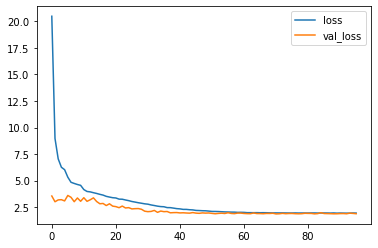

In [208]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [209]:
nn_pred = model.predict(X_test)
nn_pred

array([[5.361347 ],
       [6.1302757],
       [5.7161965],
       ...,
       [5.3438735],
       [5.3438735],
       [5.933979 ]], dtype=float32)

In [210]:
nn_pred.shape

(17069, 1)

In [211]:
type(nn_pred)

numpy.ndarray

In [212]:
type(y_test)

pandas.core.series.Series

In [213]:
y_test.shape

(17069,)

In [214]:
y_test 

23994    6.00000
21708    7.33333
79322    4.00000
721      6.97824
23369    4.60000
          ...   
56832    4.00000
46844    7.62500
70242    7.00000
12551    4.94345
53749    8.00000
Name: average_rating, Length: 17069, dtype: float64

In [216]:
mean_squared_error(y_test,nn_pred)

1.883148337347595

In [219]:
rating_nn = model.predict(X_test[0].reshape(1,-1))
print(rating_nn)

[[5.361347]]


In [221]:
y_test.iloc[0]

6.0

Surprisingly, the random forest regressor and linear regression give better result than the neural network regression

Best result is still Random Forest Regressor